# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rijal Akhdan Khairulah
- **Email:** rijal.akhdan.khairullah@gmail.com
- **ID Dicoding:** rijal_akhdan

## Menentukan Pertanyaan Bisnis

- Apakah cuaca berperan dalam mempengaruhi jumlah penggunaan sepeda?
- Apakah ada perbedaan dalam jumlah penggunaan sepeda antara hari libur dan hari kerja?
- Apakah ada perbedaan dalam jumlah penggunaan sepeda antara tahun 2011 dan 2012?
- Pada jam berapa sepeda paling sering dipinjamkan?
- Apakah musim berpengaruh terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

## Import Semua Packages/Library yang Digunakan

pada tahapan ini dilakukan pemanggilan library yang digunakan untuk analisis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

pada tahapan ini dilakukan pemanggilan dataset, karena pada penelitian ini saya menggunakan 2 dataset yaitu dataset Bike sharing yang dikumpulkan perjam dan bike sharing yang dikumpulkan perhari

In [ ]:
#Load data Day
data_day = pd.read_csv("/content/drive/MyDrive/Dataset/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Load Data Hour
data_hr = pd.read_csv("/content/drive/MyDrive/Dataset/hour.csv")
data_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
#Cek informasi dari dataset Day
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat dilihat dari hasil output diatas bahwasannya dataset day.csv memiliki 731 entries dan memiliki  15 kolom

In [ ]:
#Cek informasi dari dataset hour
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat dilihat dari hasil output diatas bahwasannya dataset hour.csv memiliki 17379 entries dan memiliki 15 kolom

In [ ]:
#Cek Statistik Deskriptif pada data day
data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Cek Statistik Deskriptif pada data hour
data_hr.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Proses diatas dilakukan untuk mengecek nilai statistik dari masing masing kolom pada kedua dataset

### Cleaning Data

In [ ]:
#Cek kolom missing value pada data day
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#Cek kolom missing value pada data hour
data_hr.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada tahapan ini dilakukan pengecekan apakah dkedua dataset memiliki missing value atau tidak. Didapatkan bahwasannya kedua data tidak memiliki nilai missing value pada seluruh kolom nya

In [ ]:
# Menghapus kolom-kolom yang tidak digunakan dari kedua dataset
data_day = data_day.drop(columns=['instant'])
data_hr = data_hr.drop(columns=['instant'])

Tahapan selanjutnya yaitu menghapus kolom yang tidak digunakan atau tidak perlu dianalisis dari kedua dataset seperti instant, kolom ini hanyalah record index dan fungsi nya hanya menunjukkan record keberapa saja

In [ ]:
# Definisi pemetaan nilai ke keterangan
mapping = {
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
    'weathersit': {1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Thunderstorm'}
}

# Melakukan pemetaan nilai ke keterangan dan mengubah tipe data secara massal
for df in [data_day, data_hr]:
    df.replace(mapping, inplace=True)
    df['dteday'] = pd.to_datetime(df['dteday'])
    df['season'] = df['season'].astype('category')
    df['yr'] = df['yr'].astype('category')
    df['mnth'] = df['mnth'].astype('category')
    df['holiday'] = df['holiday'].astype('category')
    df['weekday'] = df['weekday'].astype('category')
    df['workingday'] = df['workingday'].astype('category')
    df['weathersit'] = df['weathersit'].astype('category')

# Menampilkan hasil
data_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Selanjutnya melakukan mapping untuk mengganti isianseperti mnth season weekday dan wheaterlist untuk memudahkannya dalam memahami visualisasinya nantinya, selain itu juga memastikan data category nilainya berupa category

In [ ]:
data_hr.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data Day And Hour Bike Sharing Dataset

In [ ]:
# Agregasi data berdasarkan musim dan menghitung jumlah total peminjam sepeda tiap musim
seasonal_rental_counts = data_day.groupby('season')['cnt'].sum().reset_index()

print(seasonal_rental_counts)

   season      cnt
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


Dari hasil Eksplorasi diatas didapatkan bahwasannya Banyak peminjaman sepeda dilakukan pada musim fall dilihat dari jumlah total peminjam jika dibandingkan dengan musim musim lainnya

In [ ]:
# Kelompokkan data berdasarkan weekday dan hitung jumlah peminjam (casual dan registered)
rentals_by_weekday = data_day.groupby('weekday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

print(rentals_by_weekday)

  weekday  casual  registered     cnt
0     Fri   78238      409552  487790
1     Mon   70784      384719  455503
2     Sat  153852      323955  477807
3     Sun  140521      303506  444027
4     Thu   61460      423935  485395
5     Tue   57843      411266  469109
6     Wed   57319      415729  473048


Pada eksplorasi diatas melakukan pengelompokkan data untuk mengetahui hari yang memiliki jumlah total peminjam terbanyak. Dari hasil eksplorasi tersebut didapatkan bahwasannya peminjam terbanyak ada pada hari Jummat yaitu sebanyak 487.790

In [ ]:
# Kelompokkan data berdasarkan workingday dan hitung jumlah peminjam (casual dan registered)
rentals_by_weekday = data_day.groupby('workingday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

print(rentals_by_weekday)

  workingday  casual  registered      cnt
0          0  316732      683537  1000269
1          1  303285     1989125  2292410


Dari eksplorasi ini juga menunjukkan bahwasannya peminjam banyak meminjam sepeda pada hari hari kerja yang bukan weekend atau holiday yaitu ada sebanyak 2.292.410

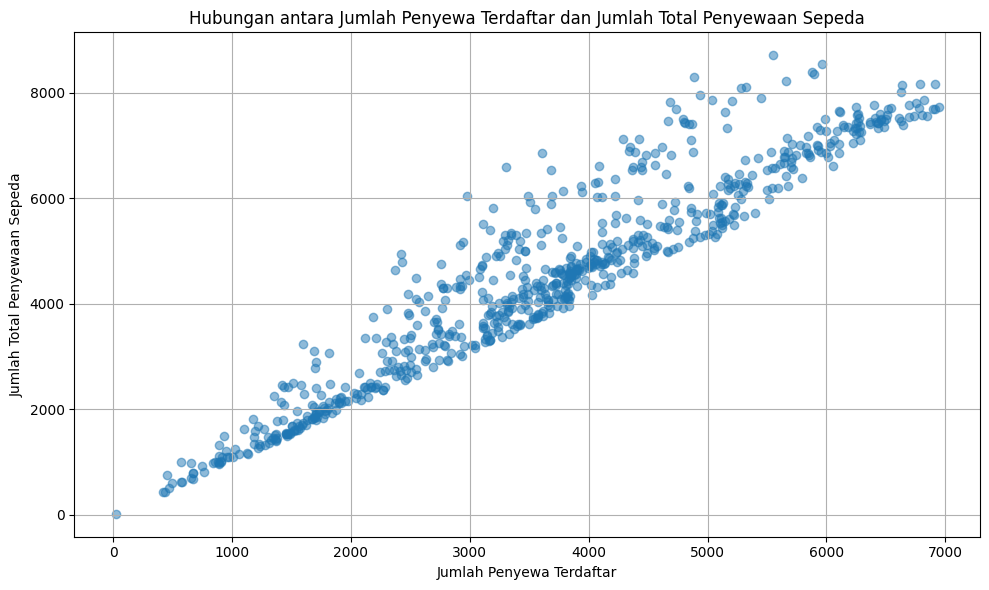

Korelasi antara cnt dan registered: 0.9455169158090357


In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_day['registered'], data_day['cnt'], alpha=0.5)
plt.title('Hubungan antara Jumlah Penyewa Terdaftar dan Jumlah Total Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewa Terdaftar')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = data_day['registered'].corr(data_day['cnt'])
print("Korelasi antara cnt dan registered:", correlation)

Dari hasil Eksplorasi diatas menggunakan scatterplot tampak bahwa terdapat korelasi postif yang kuat antara variabel peminjam registered dengan dengan total banyaknya sepeda, Darisini dapat disimpulkan bahwa peminjam registered sangat mempengaruhi dari jumlah peminjam total sepeda dengan besar korelasinya yaitu .94

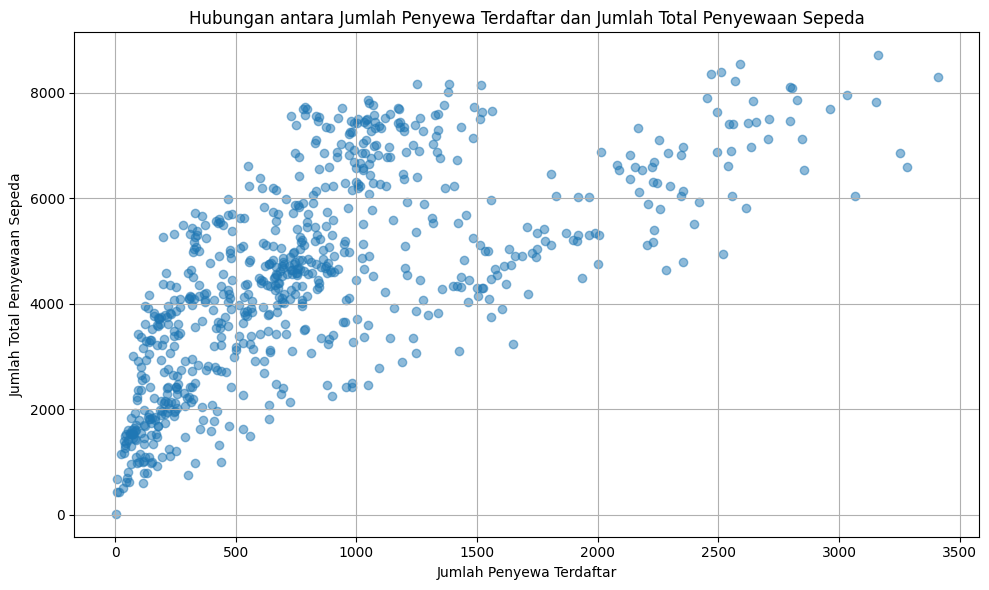

Korelasi antara cnt dan casual: 0.6728044333386833


In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_day['casual'], data_day['cnt'], alpha=0.5)
plt.title('Hubungan antara Jumlah Penyewa Terdaftar dan Jumlah Total Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewa Terdaftar')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = data_day['casual'].corr(data_day['cnt'])
print("Korelasi antara cnt dan casual:", correlation)

Lalu untuk hasil scatterplot tampak bahwa terdapat korelasi postif antara variabel peminjam registered dengan dengan total banyaknya sepeda,akan tetapi korelasi nya tidak seperti penyewa registered

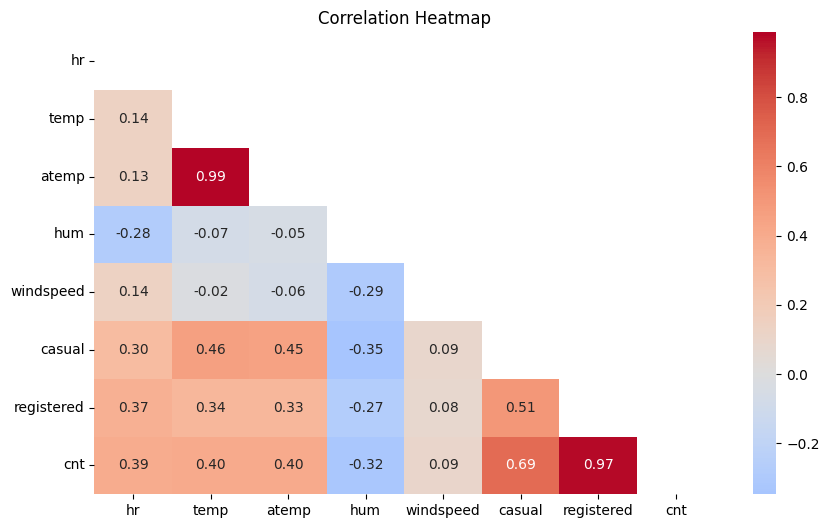

In [ ]:
# Hitung matriks korelasi antara variabel-variabel dalam dataset
correlation_matrix = data_hr.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Buat heatmap korelasi
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data_day = data_day.drop(columns=['atemp'])
data_hr = data_hr.drop(columns=['atemp'])

Dari heatmap diatas menunjukkan hubungan korelasi antar variabel, dapat dilihat temp dan atemp memiliki korelasi yang sangat tinggi karena itu dengan hanya memilih salah satu varibel dari itu saja sudah mewakili salah satu variabel jadi salah satu variabel dapat dihapus. Lalu untuk jumlah penyewa registered seperti hasil eksplorasi sebelumnya menunjukkanhubungna yang sangat kuat untuk berdampak pada varibael cnt

## Visualization & Explanatory Analysis

### Pertanyaan 1: **Apakah cuaca berperan dalam mempengaruhi jumlah penggunaan sepeda?**

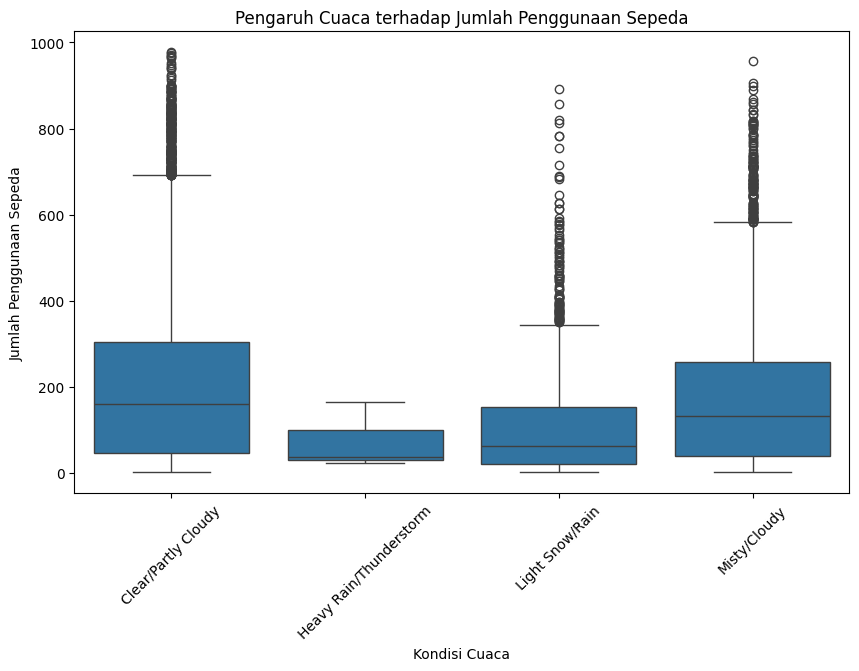

In [ ]:
# Visualisasi Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_hr, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Jumlah Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.show()

Untuk menjawab pertanyan tersebut, dapat dilihat dari visualisasi diatas, visualisasi diatas menunjukkan persebaran data Jumlah peminjam sepeda pada cuaca berbeda,, dapat diliat Rata rata peminjaman paling banyak dilakukan pada cuaca clear dan juga cloudy. pada cuca light snow/rain dan juga Heavy rain memiliki rata rata jumlah peminjam paling sedikit

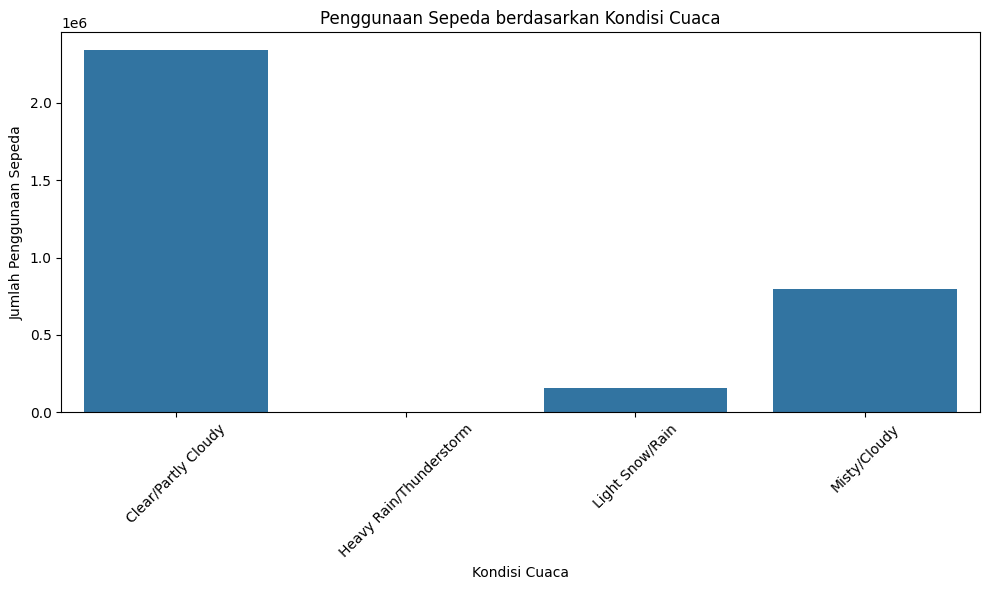

In [ ]:
# Hitung jumlah penggunaan sepeda berdasarkan kondisi cuaca
bike_usage_by_weather = data_hr.groupby('weathersit')['cnt'].sum().reset_index()
# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=bike_usage_by_weather, x='weathersit', y='cnt')
plt.title('Penggunaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari visualisasi ini juga menunjukkan hal yang sama yaitu perbandingan peminjam berdasarkan cuaca menunjukkan memang paling banyak peminjaman dilakukan saat cuaca clear

### Pertanyaan 2: Apakah ada perbedaan dalam jumlah penggunaan sepeda antara hari libur dan hari kerja?

In [ ]:
# Mengelompokkan penggunaan sepeda by workingday
bike_rentals_by_workingday = data_day.groupby('workingday')['cnt'].sum().reset_index()

# barplot
fig = go.Figure(data=[go.Bar(
    x=bike_rentals_by_workingday['workingday'].map({0: 'Hari Libur', 1: 'Hari Kerja'}),
    y=bike_rentals_by_workingday['cnt'],
    marker_color=['#FF5733', '#33FF57']
)])

#layout
fig.update_layout(
    title='Perbedaan Jumlah Penggunaan Sepeda antara Hari Libur dan Hari Kerja',
    xaxis=dict(title='Hari'),
    yaxis=dict(title='Jumlah Penggunaan Sepeda'),
)
fig.show()

Untuk menjawab pertanyaan Apakah ada perbedaan dalam jumlah penggunaan sepeda antara hari libur dan hari kerja?, dapat dilihat dari visualisasi diatas. Didapatkan bahwasannya ternyata peminjam sepeda paling banyak ada pada Hari kerja dibandingan saat hari libur

### Pertanyaan 3: Apakah ada perbedaan dalam jumlah penggunaan sepeda antara tahun 2011 dan 2012?

In [ ]:
# Grouping and aggregating bike rentals by year
bike_rentals_by_year = data_day.groupby('yr')['cnt'].sum().reset_index()

#bar plot
fig = go.Figure(data=[go.Bar(
    x=bike_rentals_by_year['yr'].map({0: '2011', 1: '2012'}),
    y=bike_rentals_by_year['cnt'],
    marker_color=['#FF5733', '#33FF57']
)])

# layout
fig.update_layout(
    title='Perbedaan Jumlah Penggunaan Sepeda antara Tahun 2011 dan 2012',
    xaxis=dict(title='Tahun'),
    yaxis=dict(title='Jumlah Penggunaan Sepeda'),
)

# Show plot
fig.show()

Untuk menjawab pertanyaan Apakah ada perbedaan dalam jumlah penggunaan sepeda antara tahun 2011 dan 2012?, dapat dilihat dari visualisasi diatas. Didapatkan bahwasannya terjadi peningkatan peminjam sepeda dari tahun 2011 ke 2012

In [ ]:
# Ubah kolom 'mnth' menjadi tipe data kategorikal dengan pesanan khusus
data_day['mnth'] = pd.Categorical(data_day['mnth'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], ordered=True)

# Mengelompokkan dan menggabungkan peminjaman sepeda berdasarkan tahun dan bulan
bike_rentals_by_month = data_day.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Filter data
bike_rentals_2011 = bike_rentals_by_month[bike_rentals_by_month['yr'] == 0]
bike_rentals_2012 = bike_rentals_by_month[bike_rentals_by_month['yr'] == 1]

# line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=bike_rentals_2011['mnth'], y=bike_rentals_2011['cnt'], mode='lines', name='2011'))
fig.add_trace(go.Scatter(x=bike_rentals_2012['mnth'], y=bike_rentals_2012['cnt'], mode='lines', name='2012'))

# layout
fig.update_layout(
    title='Tren Jumlah Penggunaan Sepeda per Bulan (2011 vs 2012)',
    xaxis=dict(title='Bulan'),
    yaxis=dict(title='Jumlah Penggunaan Sepeda'),
)

# Show plot
fig.show()

Selain itu juga, Jika dilihat dari tren Jumlah peminjam Sepeda perbulannya tidak terlalu beda untuk pola nya antara tahun 2011 dengan tahun 2012 dimana terjadi kenaikan peminjam sepeda pada bulan februari hingga oktober selanjutnya mengalami penurunan pada bulan november hingga januari.

### Pertanyaan 4: Pada jam berapa sepeda paling sering dipinjamkan?

In [ ]:
# Grouping and aggregating bike rentals by hour
bike_rentals_by_hour = data_hr.groupby('hr')['cnt'].sum().reset_index()

# Create bar plot
fig = go.Figure(data=[go.Bar(
    x=bike_rentals_by_hour['hr'],
    y=bike_rentals_by_hour['cnt'],
    marker_color='skyblue'  # Menentukan warna plot
)])

# Update layout
fig.update_layout(
    title='Jumlah Total Penyewaan Sepeda per Jam',
    xaxis=dict(title='Jam'),
    yaxis=dict(title='Jumlah Penyewaan Sepeda'),
)

# Show plot
fig.show()

Untuk menjawab pertanyaan Pada jam berapa sepeda paling sering dipinjamkan?, dapat dilihat dari visualisasi diatas. Didapatkan bahwasannya peminjam sepeda paling banyak meminjam pada jam 8 pagi dan juga pada jam 17-18 sore

### Pertanyaan 5: Apakah musim berpengaruh terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

In [ ]:
# Grouping and aggregating bike rentals by season and user type (registered)
registered_rentals_by_season = data_day.groupby(['season'])['registered'].sum().reset_index()

# Grouping and aggregating bike rentals by season and user type (casual)
casual_rentals_by_season = data_day.groupby(['season'])['casual'].sum().reset_index()

# Create bar plots for registered and casual users
fig = go.Figure()

# Add trace for registered users
fig.add_trace(go.Bar(
    x=registered_rentals_by_season['season'],
    y=registered_rentals_by_season['registered'],
    name='Registered Users'
))

# Add trace for casual users
fig.add_trace(go.Bar(
    x=casual_rentals_by_season['season'],
    y=casual_rentals_by_season['casual'],
    name='Casual Users'
))

# Update layout
fig.update_layout(
    title='Jumlah Total Penyewaan Sepeda Berdasarkan Musim dan Jenis Pelanggan',
    xaxis=dict(title='Musim'),
    yaxis=dict(title='Jumlah Penyewaan Sepeda'),
    barmode='group'
)

# Show plot
fig.show()

Untuk menjawab pertanyaan Apakah musim berpengaruh terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?, dapat dilihat dari visualisasi diatas. Didapatkan bahwasannya musim tidak mempengaruhi terhadap perbandingan jumlah penyewa sepeda berdasarkan pelanggan Casual dan Registered, karena dapat dilihat pada semua musim tetap pelanggan Registered yang menyewa sepeda lebih banyak dibandingkkan penyewa casual

## Conclusion

- Conclution pertanyaan 1
  
  Dapat dilihat dari visualisasimenunjukkan bahwa jumlah peminjam sepeda cenderung paling banyak pada cuaca clear dan cloudy, sedangkan pada cuaca light snow/rain dan heavy rain, jumlah peminjam cenderung paling sedikit. Hal ini mengindikasikan bahwa cuaca mempengaruhi aktivitas peminjaman sepeda, dengan cuaca yang cerah cenderung meningkatkan jumlah peminjam.

- Conclution pertanyaan 2

  Berdasarkan visualisasi, terdapat perbedaan dalam jumlah penggunaan sepeda antara hari libur dan hari kerja, di mana jumlah peminjam sepeda cenderung lebih banyak pada hari kerja daripada saat hari libur.

- Conclution pertanyaan 3

  Terdapat peningkatan jumlah penggunaan sepeda dari tahun 2011 ke tahun 2012. Selain itu, pola penggunaan sepeda per bulan tidak berbeda secara signifikan antara tahun 2011 dan tahun 2012, dengan kenaikan penggunaan dari bulan Februari hingga Oktober, diikuti oleh penurunan pada bulan November hingga Januari pada kedua tahun tersebut.

- Conclution pertanyaan 4

  sepeda paling sering dipinjamkan pada jam 8 pagi dan pada rentang waktu antara jam 17 dan 18 sore, berdasarkan visualisasi yang disajikan.

- Conclution pertanyaan 5

  Didapati bahwa musim tidak berpengaruh terhadap perbedaan jumlah dari jenis penyewa sepeda. Hal ini terbukti dengan data yang menunjukkan bahwa jumlah pelanggan Registered yang menyewa sepeda tetap lebih banyak daripada pelanggan Casual, tidak peduli musim apa yang sedang berlangsung.





